<a href="https://colab.research.google.com/github/vy-phung/Data-analysis/blob/main/No_Show_Medical_Appointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data analysis Medical Appointment**

The purpose of this data analysis is to find if receiving SMS or not is associated with the customers showing up or not showing up in Medical appointment. I re-analyse the data source on Kaggle (you can go to the link below if you're also interested to analyse it) 

In addition, I wil analyse other factors especially the factor of scheduling in the same day or in advance the Medical appointment may effect the relationship between SMS_received and no-show appointment. 


Data source: https://www.kaggle.com/joniarroba/noshowappointments/home 

 (In this data source there is also the explanation for variable name. Moreover, this analysis for this data source refered to Simple Regression Analysis of Public Health on Coursera )

I will use logistic regression for this analysis. 

In [2]:
#@title Import packages 
# Package
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import the visualization package
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### **Import data**

In [3]:
noshow = pd.read_csv('/content/KaggleV2-May-2016.csv')
noshow

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
print(noshow.dtypes)

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


In [ ]:
print("number of NaN values for the column No-show :", noshow['No-show'].isnull().sum())
print("number of NaN values for the column SMS_received :", noshow['SMS_received'].isnull().sum())
print("number of NaN values for the column ScheduledDay :", noshow['ScheduledDay'].isnull().sum())
print("number of NaN values for the column AppointmentDay :", noshow['AppointmentDay'].isnull().sum())

number of NaN values for the column No-show : 0
number of NaN values for the column SMS_received : 0
number of NaN values for the column ScheduledDay : 0
number of NaN values for the column AppointmentDay : 0


### **Exploratory data analysis**

In [3]:
no_show = []
for term in noshow['No-show']:
  if term == 'No':
    no_show.append('0')
  elif term == 'Yes':
    no_show.append('1')
df = pd.Series(no_show, name='noshow')
noshow = pd.concat([noshow, df], axis=1)
noshow

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,0
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,0
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,0
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,0


0    88208
1    22319
Name: noshow, dtype: int64


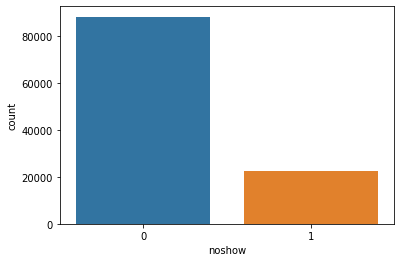

In [4]:
print(noshow['noshow'].value_counts())
sns.countplot(data=noshow,x = 'noshow')

0    75045
1    35482
Name: SMS_received, dtype: int64


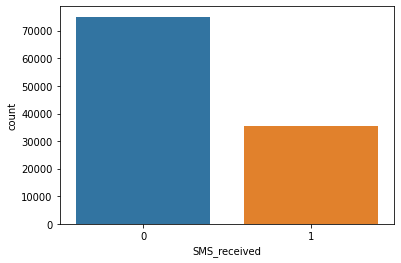

In [5]:
print(noshow['SMS_received'].value_counts())
sns.countplot(data=noshow,x = 'SMS_received')

In [4]:
x = noshow[['AppointmentDay','ScheduledDay']]
x 

,AppointmentDay,ScheduledDay
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z
4,2016-04-29T00:00:00Z,2016-04-29T16:07:23Z
...,...,...
110522,2016-06-07T00:00:00Z,2016-05-03T09:15:35Z
110523,2016-06-07T00:00:00Z,2016-05-03T07:27:33Z
110524,2016-06-07T00:00:00Z,2016-04-27T16:03:52Z
110525,2016-06-07T00:00:00Z,2016-04-27T15:09:23Z


In [5]:
month = []
year = []
for i in noshow['ScheduledDay']:
  schedule = i.split('-') 
  if schedule[0] == '2015':  year.append('2015')
  elif schedule[0] == '2016':  year.append('2016')
  if schedule[1] == '01':  month.append('01')
  elif schedule[1] == '02':  month.append('02')
  elif schedule[1] == '03':  month.append('03')
  elif schedule[1] == '04':  month.append('04')
  elif schedule[1] == '05':  month.append('05')
  elif schedule[1] == '06':  month.append('06')
  elif schedule[1] == '07':  month.append('07')
  elif schedule[1] == '08':  month.append('08')
  elif schedule[1] == '09':  month.append('09')
  elif schedule[1] == '10':  month.append('10')
  elif schedule[1] == '11':  month.append('11')
  elif schedule[1] == '12':  month.append('12')
Scheduled1 = pd.Series(month, name='Month_Sched')
Scheduled2 = pd.Series(year, name='Year_Sched')
x = pd.concat([x, Scheduled1, Scheduled2], axis=1)
x

,AppointmentDay,ScheduledDay,Month_Sched,Year_Sched
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z,04,2016
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z,04,2016
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z,04,2016
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z,04,2016
4,2016-04-29T00:00:00Z,2016-04-29T16:07:23Z,04,2016
...,...,...,...,...
110522,2016-06-07T00:00:00Z,2016-05-03T09:15:35Z,05,2016
110523,2016-06-07T00:00:00Z,2016-05-03T07:27:33Z,05,2016
110524,2016-06-07T00:00:00Z,2016-04-27T16:03:52Z,04,2016
110525,2016-06-07T00:00:00Z,2016-04-27T15:09:23Z,04,2016


In [6]:
month = []
year = []
for i in noshow['AppointmentDay']:
  appday = i.split('-') 
  if appday[0] == '2015':  year.append('2015')
  elif appday[0] == '2016':  year.append('2016')
  if appday[1] == '01':  month.append('01')
  elif appday[1] == '02':  month.append('02')
  elif appday[1] == '03':  month.append('03')
  elif appday[1] == '04':  month.append('04')
  elif appday[1] == '05':  month.append('05')
  elif appday[1] == '06':  month.append('06')
  elif appday[1] == '07':  month.append('07')
  elif appday[1] == '08':  month.append('08')
  elif appday[1] == '09':  month.append('09')
  elif appday[1] == '10':  month.append('10')
  elif appday[1] == '11':  month.append('11')
  elif appday[1] == '12':  month.append('12')
Scheduled1 = pd.Series(month, name='Month_App')
Scheduled2 = pd.Series(year, name='Year_App')
x = pd.concat([x, Scheduled1, Scheduled2], axis=1)
x

,AppointmentDay,ScheduledDay,Month_Sched,Year_Sched,Month_App,Year_App
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z,04,2016,04,2016
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z,04,2016,04,2016
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z,04,2016,04,2016
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z,04,2016,04,2016
4,2016-04-29T00:00:00Z,2016-04-29T16:07:23Z,04,2016,04,2016
...,...,...,...,...,...,...
110522,2016-06-07T00:00:00Z,2016-05-03T09:15:35Z,05,2016,06,2016
110523,2016-06-07T00:00:00Z,2016-05-03T07:27:33Z,05,2016,06,2016
110524,2016-06-07T00:00:00Z,2016-04-27T16:03:52Z,04,2016,06,2016
110525,2016-06-07T00:00:00Z,2016-04-27T15:09:23Z,04,2016,06,2016


In [7]:
print("Year of Scheduled day:", x['Year_Sched'].value_counts())
print("Year of Appointment day:", x['Year_App'].value_counts())

Year of Scheduled day: 2016    110465
2015        62
Name: Year_Sched, dtype: int64
Year of Appointment day: 2016    110527
Name: Year_App, dtype: int64


In [ ]:
Mot_SA = x[['Month_Sched','Month_App']]
Mot_SA['Month_App'] = Mot_SA['Month_App'].astype(object).astype(int)
Mot_SA['Month_Sched'] = Mot_SA['Month_Sched'].astype(object).astype(int)
Mot_SA

Months of Scheduled day: 5     67421
4     25339
6     13750
3      3614
2       281
12       61
1        60
11        1
Name: Month_Sched, dtype: int64
Months of Appointment day: 5    80841
6    26451
4     3235
Name: Month_App, dtype: int64


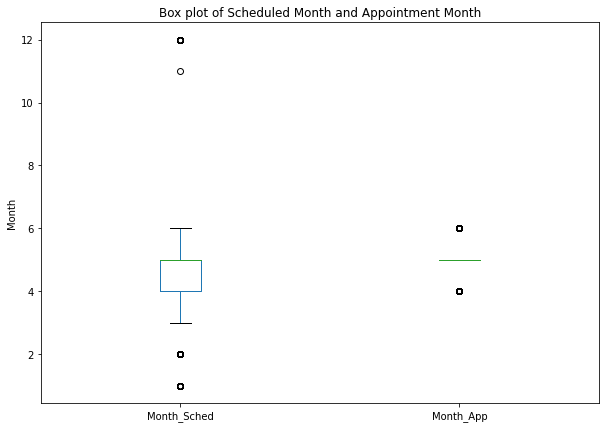

In [20]:
print("Months of Scheduled day:", Mot_SA['Month_Sched'].value_counts())
print("Months of Appointment day:", Mot_SA['Month_App'].value_counts())
Mot_SA.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Scheduled Month and Appointment Month')
plt.ylabel('Month')

plt.show()

In [ ]:
booking = []
for i in range(0,len(x)):
  if x['Year_Sched'][i] < x['Year_App'][i]:
    booking.append('in advance')
  elif x['Year_Sched'][i] == x['Year_App'][i]:
    if x['Month_Sched'][i] == x['Month_App'][i]:
      booking.append('same day')
    elif x['Month_Sched'][i] < x['Month_App'][i]:
      booking.append('in advance')
Booking = pd.Series(booking, name='Reservation')
x = pd.concat([x, Booking], axis=1)   


In [ ]:
In_adv = []
for i in x['Reservation']:
  if i == 'same day':
    In_adv.append('0')
  elif i == 'in advance':
    In_adv.append('1')
inadv = pd.Series(In_adv, name='In_advance')
x = pd.concat([x, inadv], axis=1)

In [ ]:
x

,AppointmentDay,ScheduledDay,Month_Sched,Year_Sched,Month_App,Year_App,Reservation,In_advance
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z,04,2016,04,2016,same day,0
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z,04,2016,04,2016,same day,0
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z,04,2016,04,2016,same day,0
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z,04,2016,04,2016,same day,0
4,2016-04-29T00:00:00Z,2016-04-29T16:07:23Z,04,2016,04,2016,same day,0
...,...,...,...,...,...,...,...,...
110522,2016-06-07T00:00:00Z,2016-05-03T09:15:35Z,05,2016,06,2016,in advance,1
110523,2016-06-07T00:00:00Z,2016-05-03T07:27:33Z,05,2016,06,2016,in advance,1
110524,2016-06-07T00:00:00Z,2016-04-27T16:03:52Z,04,2016,06,2016,in advance,1
110525,2016-06-07T00:00:00Z,2016-04-27T15:09:23Z,04,2016,06,2016,in advance,1


0    73079
1    37448
Name: In_advance, dtype: int64


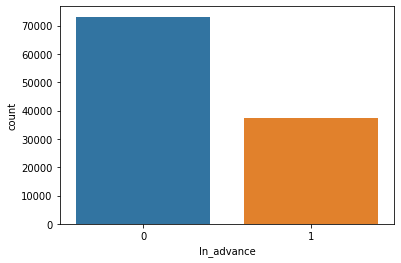

In [ ]:
print(x['In_advance'].value_counts())
sns.countplot(data=x, x = 'In_advance')

In [ ]:
noshow = pd.concat([noshow, x[['Reservation']], x[['In_advance']]], axis=1) 
noshow.to_csv('noshow.csv')

### **Statistical analysis in R**

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
noshow <- read.csv("/content/noshow.csv")
head(noshow)

  X    PatientId AppointmentID Gender         ScheduledDay       AppointmentDay
1 0 2.987250e+13       5642903      F 2016-04-29T18:38:08Z 2016-04-29T00:00:00Z
2 1 5.589978e+14       5642503      M 2016-04-29T16:08:27Z 2016-04-29T00:00:00Z
3 2 4.262962e+12       5642549      F 2016-04-29T16:19:04Z 2016-04-29T00:00:00Z
4 3 8.679512e+11       5642828      F 2016-04-29T17:29:31Z 2016-04-29T00:00:00Z
5 4 8.841186e+12       5642494      F 2016-04-29T16:07:23Z 2016-04-29T00:00:00Z
6 5 9.598513e+13       5626772      F 2016-04-27T08:36:51Z 2016-04-29T00:00:00Z
  Age     Neighbourhood Scholarship Hipertension Diabetes Alcoholism Handcap
1  62   JARDIM DA PENHA           0            1        0          0       0
2  56   JARDIM DA PENHA           0            0        0          0       0
3  62     MATA DA PRAIA           0            0        0          0       0
4   8 PONTAL DE CAMBURI           0            0        0          0       0
5  56   JARDIM DA PENHA           0            1       

#### **Unadjusted data**

In [ ]:
%%R
result_un = glm(noshow$noshow ~ noshow$SMS_received, family = binomial)
summary(result_un)


Call:
glm(formula = noshow$noshow ~ noshow$SMS_received, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8033  -0.6046  -0.6046  -0.6046   1.8919  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.606802   0.009786 -164.19   <2e-16 ***
noshow$SMS_received  0.641137   0.015391   41.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111206  on 110526  degrees of freedom
Residual deviance: 109503  on 110525  degrees of freedom
AIC: 109507

Number of Fisher Scoring iterations: 4



In [ ]:
%%R
coef(result_un)

        (Intercept) noshow$SMS_received 
          -1.606802            0.641137 


According to above summary, ln(odds of being a "no-show") = -1.606802 + 0.641137x where x = 1 if the patients received a SMS, and 0 if the patient did not receive a SMS. The standard error of the slope estimate for x and intercept respectively is  0.015391, 0.009786


Unadjusted odds ratio (and 95% CI) of being a "no-show" for these who received a SMS compared to those who did not: 1.899(1.841, 1.958)

#### **Adjusted data**

In [ ]:
%%R
result_ad = glm(noshow$noshow ~ noshow$SMS_received + noshow$In_advance, family = binomial)
summary(result_ad)


Call:
glm(formula = noshow$noshow ~ noshow$SMS_received + noshow$In_advance, 
    family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8896  -0.6166  -0.5539  -0.5539   1.9751  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.79707    0.01094 -164.20   <2e-16 ***
noshow$SMS_received  0.23348    0.01773   13.17   <2e-16 ***
noshow$In_advance    0.84091    0.01743   48.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111206  on 110526  degrees of freedom
Residual deviance: 107188  on 110524  degrees of freedom
AIC: 107194

Number of Fisher Scoring iterations: 4



In [ ]:
%%R
coef(result_ad)

        (Intercept) noshow$SMS_received   noshow$In_advance 
         -1.7970683           0.2334772           0.8409114 


According to above summary having adjustment, ln(odds of being a "no-show") = - 1.7970683 + 0.2334772x1 + 0.8409114x2 where:

x1 = 1 if the patients received a SMS, and 0 if the patient did not receive a SMS. 

x2 = 1 if patients booking in advance, and 0 if patients booking same day to appointment.

The standard errors of the intercept, slope estimate for x1, and x2 and respectively are 0.01094, 0.01773, 0.01743.

#### **Stratified analysis**
In this section, I will analyse separatedly 2 groups (same day or in advance) in order to see if the association between SMS_received and no show up can be different in thess 2 groups    

##### **In advance group** (people had scheduled day before appointment day)

In [ ]:
%%R
x_in = noshow[noshow$Reservation == 'in advance',]
head(x_in)

      X    PatientId AppointmentID Gender         ScheduledDay
50   49 9.223559e+13       5534656      F 2016-03-31T17:11:17Z
51   50 1.827172e+14       5534661      F 2016-03-31T17:12:45Z
52   51 4.694699e+13       5534635      F 2016-03-31T17:05:31Z
53   52 7.987570e+14       5534639      F 2016-03-31T17:06:17Z
178 177 7.271247e+12       5482953      M 2016-03-17T10:33:33Z
184 183 7.254972e+11       5524189      M 2016-03-30T07:32:47Z
          AppointmentDay Age  Neighbourhood Scholarship Hipertension Diabetes
50  2016-04-29T00:00:00Z  27 GRANDE VITÓRIA           0            0        0
51  2016-04-29T00:00:00Z  19 GRANDE VITÓRIA           0            0        0
52  2016-04-29T00:00:00Z  23 GRANDE VITÓRIA           1            0        0
53  2016-04-29T00:00:00Z  23 GRANDE VITÓRIA           1            0        0
178 2016-04-29T00:00:00Z  11 NOVA PALESTINA           0            0        0
184 2016-04-29T00:00:00Z  69      CONQUISTA           0            0        0
    Alcoholis

In [ ]:
%%R
result_in = glm(x_in$noshow ~ x_in$SMS_received, family = binomial)
summary(result_in)


Call:
glm(formula = x_in$noshow ~ x_in$SMS_received, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9227  -0.8220  -0.8220   1.4555   1.5807  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.63353    0.01792  -35.36   <2e-16 ***
x_in$SMS_received -0.27789    0.02296  -12.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 46293  on 37447  degrees of freedom
Residual deviance: 46147  on 37446  degrees of freedom
AIC: 46151

Number of Fisher Scoring iterations: 4



In [ ]:
%%R
coef(result_in)

      (Intercept) x_in$SMS_received 
       -0.6335312        -0.2778898 


In [ ]:
%%R 
dim(x_in)

[1] 37448    18


According to above summary of 37448 appointments booked in advance, this is the following logistic regression which show association between no-shows and SMS_received in this in advance group:

ln(odds of being a "no-show") = - 0.6335312 + - 0.2778898x where x = 1 if the patients received a SMS, and 0 if the patient did not receive a SMS. 
The standard errors of the intercept and slope estimate for x respectively are 0.01792, 0.02296.

Odds ratio (and 95% CI) of being a "no-show" for these who booking in advance received a SMS compared to those who booking in advance but did not received: 
0.757 (0.723, 0.793)

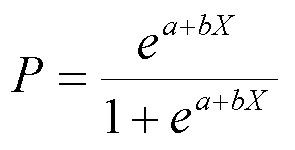

p(SMS) = e^(- 0.6335312 + - 0.2778898) / (1+e^(- 0.6335312 + - 0.2778898)) = 0.287  

p(noSMS) = e^(- 0.6335312) / (1+e^(- 0.6335312)) = 0.347

RD (Risk difference) = p(SMS) - p(noSMS) = 0.287 - 0.347 = -0.06

For the patients booking before appointment day, there is 6% reduction of risk no showing up in Medical appointment if they received SMS compared to those who didn't receive SMS 

##### **Same day group** (people had scheduled the same day to appointment day)

In [ ]:
%%R
x_sam = noshow[noshow$Reservation == 'same day',]
head(x_sam)

  X    PatientId AppointmentID Gender         ScheduledDay       AppointmentDay
1 0 2.987250e+13       5642903      F 2016-04-29T18:38:08Z 2016-04-29T00:00:00Z
2 1 5.589978e+14       5642503      M 2016-04-29T16:08:27Z 2016-04-29T00:00:00Z
3 2 4.262962e+12       5642549      F 2016-04-29T16:19:04Z 2016-04-29T00:00:00Z
4 3 8.679512e+11       5642828      F 2016-04-29T17:29:31Z 2016-04-29T00:00:00Z
5 4 8.841186e+12       5642494      F 2016-04-29T16:07:23Z 2016-04-29T00:00:00Z
6 5 9.598513e+13       5626772      F 2016-04-27T08:36:51Z 2016-04-29T00:00:00Z
  Age     Neighbourhood Scholarship Hipertension Diabetes Alcoholism Handcap
1  62   JARDIM DA PENHA           0            1        0          0       0
2  56   JARDIM DA PENHA           0            0        0          0       0
3  62     MATA DA PRAIA           0            0        0          0       0
4   8 PONTAL DE CAMBURI           0            0        0          0       0
5  56   JARDIM DA PENHA           0            1       

In [ ]:
%%R
result_sam = glm(x_sam$noshow ~ x_sam$SMS_received, family = binomial)
summary(result_sam)


Call:
glm(formula = x_sam$noshow ~ x_sam$SMS_received, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7650  -0.5205  -0.5205  -0.5205   2.0327  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.93037    0.01214 -158.97   <2e-16 ***
x_sam$SMS_received  0.85146    0.02440   34.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 61067  on 73078  degrees of freedom
Residual deviance: 59945  on 73077  degrees of freedom
AIC: 59949

Number of Fisher Scoring iterations: 4



In [ ]:
%%R
coef(result_sam)

       (Intercept) x_sam$SMS_received 
        -1.9303749          0.8514583 


In [ ]:
%%R 
dim(x_sam)

[1] 73079    18


According to above summary of 73079 appointments booked in the same day, this is the following logistic regression which show association between no-shows and SMS_received in this same day group:

ln(odds of being a "no-show") = -1.9303749 + 0.8514583x where x = 1 if the patients received a SMS, and 0 if the patient did not receive a SMS. 
The standard errors of the intercept and slope estimate for x respectively are 0.01214, 0.02440.

Odds ratio (and 95% CI) of being a "no-show" for these who booking the same day received a SMS compared to those who booking the same day but did not received: 
2.343 (2.231, 2.46)

p(SMS) = e^(-1.9303749 + 0.8514583) / (1+e^(-1.9303749 + 0.8514583)) = 0.254  

p(noSMS) = e^(-1.9303749) / (1+e^(-1.9303749)) = 0.127

RD (Risk difference) = p(SMS) - p(noSMS) = 0.254 - 0.127 = 0.127

For the patients booking in the same day to appointment day, there is 12.7% greater of risk no showing up in Medical appointment if they received SMS compared to those who didn't receive SMS 

### **Predicting and classifying**

#### Predicting noshow in appointment by SMS_received column

In [ ]:
x1 = noshow[['SMS_received']]
y = noshow[['No-show']]
lr = LogisticRegression()
lr.fit(x1,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print(lr.predict(noshow[['SMS_received']])[0:5])
print(noshow[['No-show']].values[0:5])

['No' 'No' 'No' 'No' 'No']
[['No']
 ['No']
 ['No']
 ['No']
 ['No']]


##### Train and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, random_state=0)
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print(lr.predict(x_test)[0:10])
print(y_test.values[0:10])

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']
[['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']]


In [ ]:
print("confusion matrix:",metrics.confusion_matrix(y_test, lr.predict(x_test)))
print("Accuracy:",metrics.accuracy_score(y_test, lr.predict(x_test)))
print("Precision:",metrics.precision_score(y_test, lr.predict(x_test), average="binary", pos_label="No")) # pos_label: positive value

confusion matrix: [[17725     0]
 [ 4381     0]]
Accuracy: 0.8018185108115444
Precision: 0.8018185108115444


#### Predicting noshow in appointment by SMS_received and In_advance columns

In [ ]:
x2 = noshow[['SMS_received', 'In_advance']]
y = noshow[['No-show']]
lr1 = LogisticRegression()
lr1.fit(x2,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print(lr1.predict(x2)[0:5])
print(noshow[['No-show']].values[0:5])

['No' 'No' 'No' 'No' 'No']
[['No']
 ['No']
 ['No']
 ['No']
 ['No']]


##### Train and test data

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.20, random_state=0)
lr1.fit(x2_train,y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print(lr1.predict(x2_test)[0:10])
print(y2_test.values[0:10])

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']
[['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']]


In [ ]:
print("confusion matrix:",metrics.confusion_matrix(y2_test, lr1.predict(x2_test)))
print("Accuracy:",metrics.accuracy_score(y2_test, lr1.predict(x2_test)))
print("Precision:",metrics.precision_score(y2_test, lr1.predict(x2_test), average="binary", pos_label="No")) # pos_label: positive value

confusion matrix: [[17725     0]
 [ 4381     0]]
Accuracy: 0.8018185108115444
Precision: 0.8018185108115444
